In [1]:
# Include in Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score,f1_score

In [3]:
# Load Dataset and Preprocessing

In [4]:
data = pd.read_csv('emails.csv', encoding="latin-1")[['text','spam']]

In [5]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
# Replace null value with null string

In [9]:
dataset = data.where((pd.notnull(data)), '')

In [10]:
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [11]:
dataset.shape

(5728, 2)

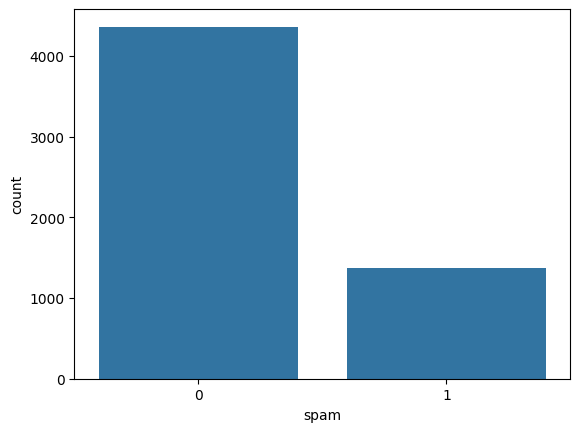

In [12]:
sns.countplot(data=dataset,x='spam')
plt.show()

In [13]:
# Devide train and test data

In [14]:
x = dataset[["text"]]
y = dataset["spam"]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data['text'], data['spam'], test_size=0.2, random_state=42
)


In [16]:
# Contert text data into feature vector that used as a input for our ML model

In [17]:
#Train Model

In [18]:
from sklearn.svm import SVC
pipeline = Pipeline ([
    ("tfidv", TfidfVectorizer(stop_words='english',min_df=1,lowercase=True)),
    # ("model", LogisticRegression(max_iter=100, C=1.0,
    # fit_intercept=True,
    # intercept_scaling=1,
    # class_weight=None))
    ("model", SVC())
])


In [19]:
pipeline.fit(X_train,Y_train)

,steps,"[('tfidv', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [20]:
dataset['spam'][0]

np.int64(1)

In [21]:
 prediction = pipeline.predict(["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"])
 print(prediction)

[1]


In [22]:
print("This mail is","Spam mail" if prediction[0] == 1  else "Not spam")

This mail is Spam mail


In [23]:
# Evaluation Model

In [24]:
predictions = pipeline.predict(X_test)


In [25]:
mse = mean_squared_error(Y_test, predictions)
print("Mean_squar_error is:", mse )
print("Root_mean_squar error is:", np.sqrt(mse))

Mean_squar_error is: 0.010471204188481676
Root_mean_squar error is: 0.10232890201933018


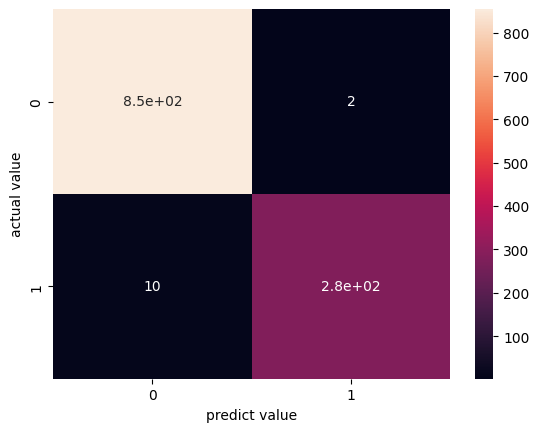

In [26]:
c = confusion_matrix(Y_test,predictions)
sns.heatmap(c, annot=True)
plt.xlabel("predict value")
plt.ylabel("actual value")
plt.show()

In [27]:
precision_score(Y_test,predictions)*100

99.29078014184397

In [28]:
recall_score(Y_test,predictions)*100

96.55172413793103

In [29]:
f1_score(Y_test,predictions)*100

97.9020979020979

In [30]:
print("Accuracy:", accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))


Accuracy: 0.9895287958115183
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [31]:
from joblib import dump, load

In [33]:
dump(pipeline, "spam_prediction.joblib")

['spam_prediction.joblib']

In [34]:
model = load('spam_prediction.joblib')

In [36]:
pipeline.predict(["Subject: re : rotational opportunities within your group  kate ,  my assistant , shirley crenshaw , will schedule a meeting .  vince  kate lucas  10 / 17 / 2000 11 : 57 am  to : vince j kaminski / hou / ect @ ect  cc :  subject : rotational opportunities within your group  dear vince ,  i am a rotating associate and would like to learn more about opportunities  within your group . i have worked in rac and am currently in financial  trading . i believe the associate / analyst program may forward you my cv , but i  thought it good to get in touch personally .  please let me know if there is someone with whom i could speak about the  group and its needs for associates .  with best regards ,  kate"])

array([0])